In [138]:
%load_ext autoreload
%autoreload 2

In [139]:
# Import libreries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [140]:
# Configure the custom library path
import os
import sys

module_path = os.path.abspath(os.path.join('../'))
sys.path.insert(0, module_path)

In [141]:
data = pd.read_csv('./data.csv', sep = ";")
data_auto = pd.read_csv('./datos_automaticos.csv', sep = ",")


print(data_auto.head())

    Voltaje  Corriente  Resistencia 
0  0.030871   0.002500     12.348400
1  0.061792   0.005000     12.358400
2  0.092737   0.007500     12.364933
3  0.123730   0.010000     12.373000
4  0.154790   0.012499     12.384191


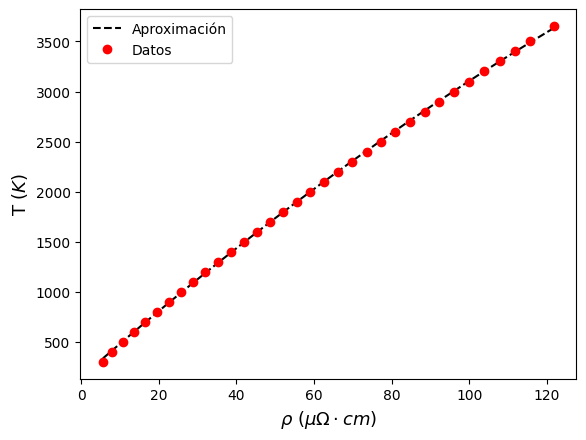

In [142]:
Temperatura = data['T_fil']
Resistividad = data['R_fil']


def model_cuadratic(x,a,b,c):
  return  a*x**2 + b*x + c

plt.plot(Resistividad, model_cuadratic(Resistividad, -4.39E-2, 33.994, 145.15), 'k--', label="Aproximación")
plt.plot(Resistividad, Temperatura, 'ro', label="Datos")
plt.ylabel(r'T $(K)$', size = 13)
plt.xlabel(r'$\rho$ $(\mu\Omega\cdot cm)$', size = 13)
plt.legend()
plt.savefig('temp_res.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()

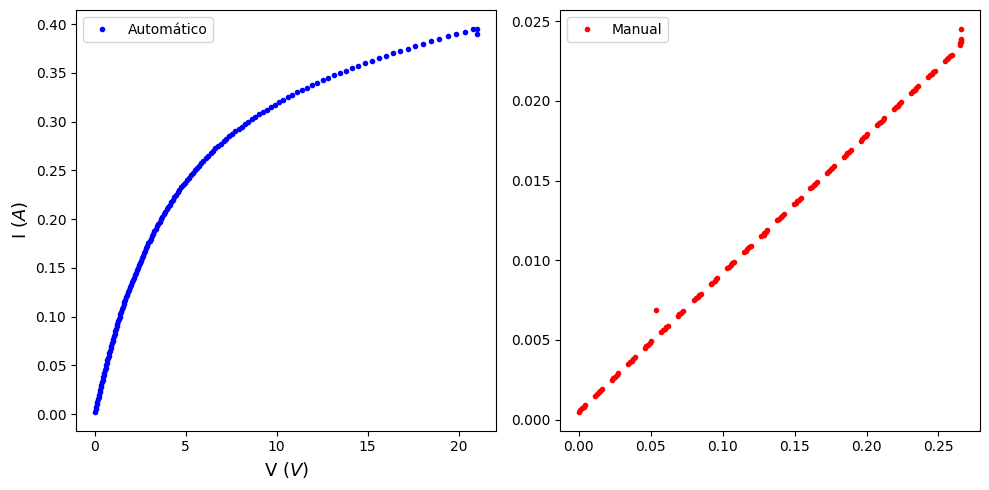

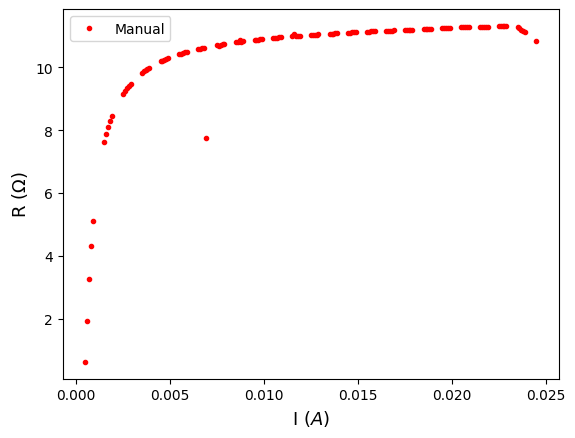

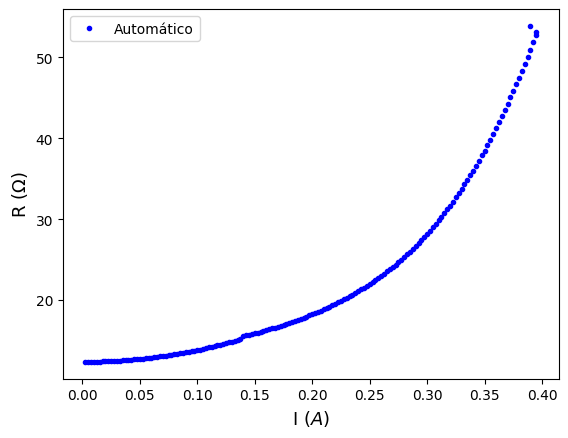

In [143]:
I_man = data['i_man']
V_man = data['v_man']
res_manual = V_man / I_man

I_auto = data_auto['Corriente']
V_auto = data_auto['Voltaje']
res_auto = V_auto / I_auto




fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# trazar la primera gráfica en el primer subplot
ax1.plot(V_auto, I_auto, 'b.', label="Automático")
ax1.set_ylabel(r'I $(A)$', size=13)
ax1.set_xlabel(r'V $(V)$', size=13)
ax1.legend()

# trazar la segunda gráfica en el segundo subplot
ax2.plot(V_man, I_man, 'r.', label="Manual")
ax1.set_ylabel(r'I $(A)$', size=13)
ax1.set_xlabel(r'V $(V)$', size=13)
ax2.legend()

# ajustar los subplots para que no se superpongan
fig.tight_layout()

plt.show()


plt.plot(I_man, res_manual, 'r.', label="Manual")
plt.ylabel(r'R $(\Omega)$', size = 13)
plt.xlabel(r'I $(A)$', size = 13)
plt.legend()
plt.show()

plt.plot(I_auto, res_auto, 'b.', label="Automático")
# plt.plot(I_auto, model_cuadratic(I_auto, *popt), 'k--', label="Aproximación")
plt.ylabel(r'R $(\Omega)$', size = 13)
plt.xlabel(r'I $(A)$', size = 13)
plt.legend()
plt.show()

In [144]:
# En Ohms
R0_ojo = 12.3384
R0_auto = model_cuadratic(0, *popt)

# En Kelvin
T_ambiente = 297.74

print("R0 ojo: ", R0_ojo)
print("R0 auto: ", R0_auto)
print("T ambiente: ", T_ambiente)

R0 ojo:  12.3384
R0 auto:  15.01861159585725
T ambiente:  297.74


la:  2.70314


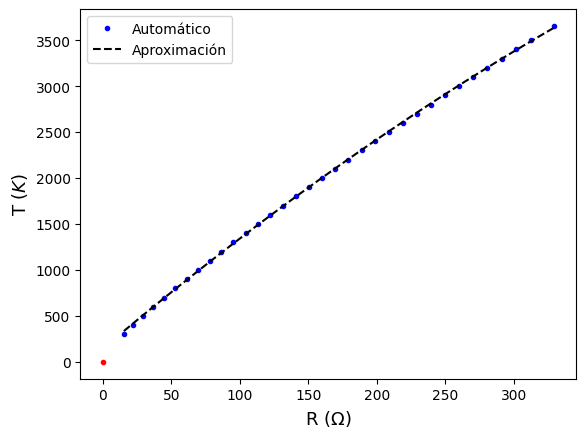

758.9254698986908


In [145]:
la = 2.70314

print("la: ", la)


r_rango = Resistividad * la

# Remove infs or NaNs
r_rango = r_rango[~np.isnan(r_rango)]
Temperatura = Temperatura[~np.isnan(Temperatura)]

def model_lineal(x,a,b):
  return  a*x + b

initial_guess = [-1, 2, 1]
values_curve_tk_vs_r, pcov = curve_fit(model_cuadratic, r_rango, Temperatura, p0=initial_guess)

# fig = plt.figure()
# fig.set_figheight(10)
# fig.set_figwidth(20)

plt.plot(r_rango, Temperatura, 'b.', label="Automático")
plt.plot([0], [0], 'r.')
plt.plot(r_rango, model_cuadratic(r_rango, *values_curve_tk_vs_r), 'k--', label="Aproximación")
plt.ylabel(r'T $(K)$', size = 13)
plt.xlabel(r'R $(\Omega)$', size = 13)
plt.legend()
plt.show()

print(model_cuadratic(50, *values_curve_tk_vs_r))



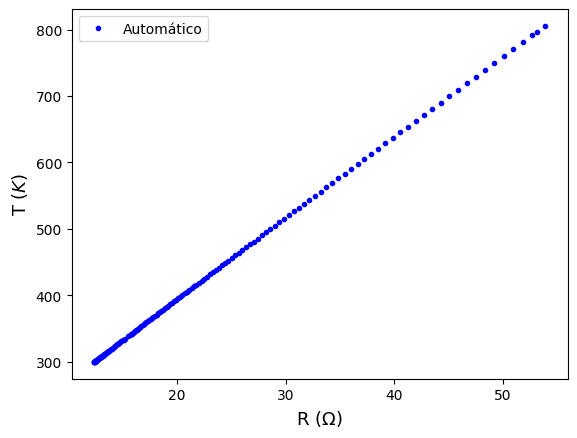

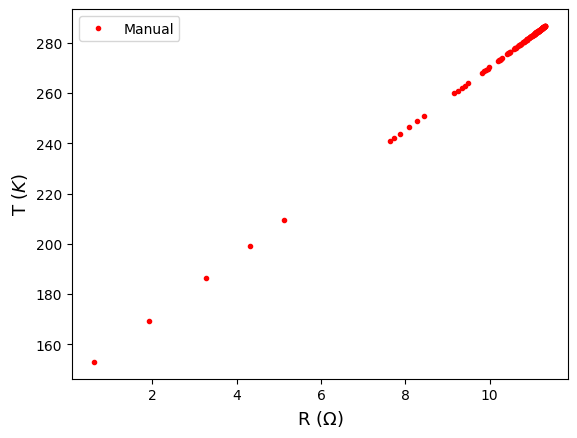

0       0.620000
1       1.916667
2       3.271429
3       4.312500
4       5.111111
         ...    
116    11.239831
117    11.198734
118    11.155042
119    11.112552
120    10.840408
Length: 121, dtype: float64


In [146]:
res_auto = res_auto[~np.isnan(res_auto)]
temperature_fil_auto = model_cuadratic(res_auto, *values_curve_tk_vs_r)


plt.plot(res_auto, temperature_fil_auto, 'b.', label="Automático")
plt.xlabel(r'R $(\Omega)$', size = 13)
plt.ylabel(r'T $(K)$', size = 13)
plt.legend()

plt.show()

res_manual = res_manual[~np.isnan(res_manual)]
temperature_fil_manual = model_cuadratic(res_manual, *values_curve_tk_vs_r)

plt.plot(res_manual, temperature_fil_manual, 'r.', label="Manual")
plt.xlabel(r'R $(\Omega)$', size = 13)
plt.ylabel(r'T $(K)$', size = 13)
plt.legend()

plt.show()

print(res_manual)
